# Analyze Product Sentiment

In [1]:
import turicreate

ModuleNotFoundError: No module named 'turicreate'

# Read product review data

In [3]:
products = turicreate.SFrame('~/Desktop/DS/ML-W/amazon_baby.sframe')

# Explore data

In [4]:
products

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [5]:
products.groupby('name',operations={'count':turicreate.aggregate.COUNT()}).sort('count',ascending=False)

name,count
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


# Examine the reivews for the most-reviewed product

In [6]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [7]:
giraffe_reviews

name,review,rating
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0


In [8]:
len(giraffe_reviews)

785

In [9]:
giraffe_reviews['rating'].show()

Materializing SArray

# Building a sentiment classifier

## Build word count vectors

In [10]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [10]:
products

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'and': 5, '6': 1,'stink': 1, 'because' ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1, 'and':3, 'love': 2, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2, 'parents!!':1, 'all': 2, 'puppet.': ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2, 'this': 2,'her': 1, 'help': 2, ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1, 'noble': 1,'is': 1, 'it': 1, 'as': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2, 'all': 1,'right': 1, 'when': 1, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1, 'help': 1,'give': 1, 'is': 1, ' ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1, 'nanny':1, 'standarad': 1, ..."


# Define what is positive and negative sentiment

In [21]:
products['rating'].show()

Materializing SArray

In [12]:
#ignore all 3*  reviews
products = products[products['rating']!= 3]

In [13]:
#positive sentiment = 4-star or 5-star reviews
products['sentiment'] = products['rating'] >= 4

In [14]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0,'comfortable': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0,'recommend': 1.0, ...",1


In [15]:
products['sentiment'].show()

Materializing SArray

# Train our sentiment classifier

In [16]:
train_data,test_data = products.random_split(.8,seed=0)

In [22]:
sentiment_model = turicreate.logistic_classifier.create(train_data,target='sentiment', features=['word_count'], validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 1.092203     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 2.658307     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 3.323540     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 3.746992     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 4.458807     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 7.128003     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the sentiment classifier to better understand the Giraffe reviews

In [28]:
products['predicted_sentiment'] = sentiment_model.predict(products, output_type = 'probability')

In [30]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0,'comfortable': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0,'recommend': 1.0, ...",1


In [33]:
roc_curve = turicreate.evaluation.roc_curve(products['sentiment'], products['predicted_sentiment'])
roc_curve

threshold,fpr,tpr,p,n
0.0,1.0,1.0,140259,26493
1e-05,0.76016306194089,0.99950092329191,140259,26493
2e-05,0.7376288076095573,0.9994153672848088,140259,26493
3e-05,0.7233231419620277,0.9993725892812583,140259,26493
4e-05,0.7125278375419922,0.9993298112777077,140259,26493
5e-05,0.7029403993507719,0.999301292608674,140259,26493
6e-05,0.6952025063224248,0.9992371256033481,140259,26493
7e-05,0.6895783791945042,0.9992157366015728,140259,26493
8e-05,0.6846336768202922,0.999201477267056,140259,26493
9e-05,0.6794247537085267,0.9991586992635054,140259,26493


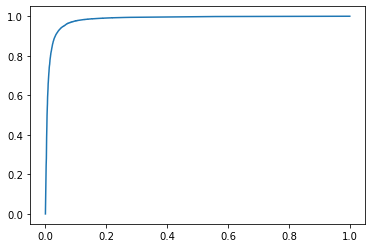

In [32]:
import matplotlib.pyplot as plt
plt.plot(roc_curve['fpr'],roc_curve['tpr'])

In [20]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [21]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'and': 1, 'all': 1,'because': 1, 'it': 1, ...",1
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'and': 1, 'right': 1,'help': 1, 'just': 1, ...",1
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'and': 2, 'all': 1,'would': 1, 'latex.': 1, ...",0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'and': 2, 'one!': 1,'all': 1, 'love': 1, ...",1
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'and': 3, 'all': 1,'months': 1, 'old': 1, ...",1
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'and': 6, 'seven': 1,'already': 1, 'love': 1, ...",1
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'and': 4, 'drooling,':1, 'love': 1, ...",1
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'and': 3, 'chew': 1,'be': 1, 'is': 1, ...",1
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'chew': 2, 'seemed': 1,'because': 1, 'about.': ...",1
Vulli Sophie the GiraffeTeether ...,This product is without adoubt the best on the ...,5.0,"{'and': 4, ':)': 1,'just': 2, 'give': 1, ...",1


# Sort the Giraffe reviews according to predicted sentiment

In [22]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [23]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'giggles': 1, 'all': 1,""violet's"": 2, 'bring': ...",1
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'adoring': 1, 'find': 1,'month': 1, 'bright': 1, ...",1
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'all': 2, 'discovered':1, 'existence.': 1, ...",1
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'all': 2, ""don't"": 1,'(literally).so': 1, ...",1
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'cute': 1, 'all': 1,'reviews.': 2, 'just' ...",1
Vulli Sophie the GiraffeTeether ...,Sophie the Giraffe is theperfect teething toy. ...,5.0,"{'just': 2, 'both': 1,'month': 1, 'ears,': 1, ...",1
Vulli Sophie the GiraffeTeether ...,Sophie la giraffe isabsolutely the best toy ...,5.0,"{'and': 5, 'the': 1,'all': 1, 'that': 2, ...",1
Vulli Sophie the GiraffeTeether ...,My 5-mos old son took tothis immediately. The ...,5.0,"{'just': 1, 'shape': 2,'mutt': 1, '""dog': 1, ...",1
Vulli Sophie the GiraffeTeether ...,My nephews and my fourkids all had Sophie in ...,5.0,"{'and': 4, 'chew': 1,'all': 1, 'perfect;': 1, ...",1
Vulli Sophie the GiraffeTeether ...,Never thought I'd see myson French kissing a ...,5.0,"{'giggles': 1, 'all': 1,'out,': 1, 'over': 1, ...",1


In [24]:
giraffe_reviews.tail()

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,I bought it for my 8month old (I know it's ...,2.0,"{'and': 5, 'enjoy': 1,'right': 1, 'old': 1, ...",0
Vulli Sophie the GiraffeTeether ...,When we first got it Ithought did my ...,2.0,"{'and': 2, 'cute': 1,'all': 1, 'because': 1, ...",0
Vulli Sophie the GiraffeTeether ...,After getting this for mybaby and after she su ...,1.0,"{'just': 1, 'being': 1,'over': 1, 'chalked': 1, ...",0
Vulli Sophie the GiraffeTeether ...,"My daughter loves Sophie,but we received her as a ...",2.0,"{'and': 2, 'the': 3,""don't"": 1, 'doing': 1, ...",0
Vulli Sophie the GiraffeTeether ...,"""Sophie the Giraffe"" hastested positive for ...",1.0,"{'saying': 1,'nitrosamines.': 1, ...",0
Vulli Sophie the GiraffeTeether ...,I received this in a boxset as a gift. It came ...,2.0,"{'cute': 1, 'unhooked':1, 'being': 2, 'stora ...",0
Vulli Sophie the GiraffeTeether ...,I was intrigued with theidea of Sophie the ...,2.0,"{'baby.)': 1, 'all': 2,'able': 1, 'month': 1, ...",0
Vulli Sophie the GiraffeTeether ...,I wanted to love thisproduct and was excited ...,1.0,"{'just': 1, 'may,': 1,'children': 1, 'bummed': ...",0
Vulli Sophie the GiraffeTeether ...,This children's toy isnostalgic and very cute. ...,1.0,"{'expectations.': 1,'refund': 1, 'there': 1, ...",0
Vulli Sophie the GiraffeTeether ...,"My son (now 2.5) LOVEDhis Sophie, and I bought ...",1.0,"{'all': 1, 'just': 1,""don't"": 1, 'over': 2, ...",0


## Show the most positive reviews

In [25]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [26]:
giraffe_reviews[1]['review']

"I'm not sure why Sophie is such a hit with the little ones, but my 7 month old baby girl is one of her adoring fans.  The rubber is softer and more pleasant to handle, and my daughter has enjoyed chewing on her legs and the nubs on her head even before she started teething.  She also loves the squeak that Sophie makes when you squeeze her.  Not sure what it is but if Sophie is amongst a pile of her other toys, my daughter will more often than not reach for Sophie.  And I have the peace of mind of knowing that only edible and safe paints and materials have been used to make Sophie, as opposed to Bright Starts and other baby toys made in China.  Now that the research is out on phthalates and other toxic substances in baby toys, I think it's more important than ever to find good quality toys that are also safe for our babies to handle and put in their mouths.  Sophie is a must-have for every new mom in my opinion.  Even if your kid is one of the few that can take or leave her, it's worth

# Most negative reivews

In [27]:
giraffe_reviews[-1]['review']

"My son (now 2.5) LOVED his Sophie, and I bought one for every baby shower I've gone to. Now, my daughter (6 months) just today nearly choked on it and I will never give it to her again. Had I not been within hearing range it could have been fatal. The strange sound she was making caught my attention and when I went to her and found the front curved leg shoved well down her throat and her face a purply/blue I panicked. I pulled it out and she vomited all over the carpet before screaming her head off. I can't believe how my opinion of this toy has changed from a must-have to a must-not-use. Please don't disregard any of the choking hazard comments, they are not over exaggerated!"

In [34]:
giraffe_reviews[-2]['review']

'My baby who is currently teething love his Sophie. I little bit expensive for a chew toy but it does its job.'

# Quiz

### 1. Use .apply() to build a new feature with the counts for each of the selected_words:

In [44]:
def wordcount(w,dict):
    if w in dict:
        return dict[w]
    else:
        return 0

In [45]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']


for i in selected_words:
    products[i] = products['word_count'].apply(lambda x : wordcount(i,x))

In [65]:
for j in selected_words:
    print (j, products[j].sum())

awesome 3892.0
great 55791.0
fantastic 1664.0
amazing 2628.0
love 41994.0
horrible 1110
bad 4183
terrible 1146.0
awful 687
wow 425
hate 1107


### 2. Create a new sentiment analysis model using only the selected_words as features

In [67]:
train_data, test_data = products.random_split(.8, seed=0)

selected_words_model = turicreate.logistic_classifier.create(train_data, target='sentiment', features=selected_words, validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.238673     | 0.847401          | 0.845874            |

| 2         | 3        | 0.358458     | 0.847514          | 0.846085            |

| 3         | 4        | 0.479482     | 0.847626          | 0.846115            |

| 4         | 5        | 0.592836     | 0.847708          | 0.846385            |

| 5         | 6        | 0.709506     | 0.847708          | 0.846385            |

| 6         | 7        | 0.824118     | 0.847708          | 0.846385            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [99]:
selected_words_model.coefficients.sort('value', ascending=False).tail()

name,index,class,value,stderr
awesome,None,1,1.133534666034134,0.08399643983187562
amazing,None,1,1.100093311366018,0.0995477626046598
fantastic,None,1,0.88580475688142,0.11167591293399651
great,None,1,0.8630655001196439,0.018955052444376685
wow,None,1,-0.00953823606768843,0.16046411224711649
bad,None,1,-0.9914778800650664,0.03848428664699063
hate,None,1,-1.3484407222463202,0.07715698604297323
awful,None,1,-2.0529082040313598,0.10099735435259247
terrible,None,1,-2.2236614360851346,0.07731736203785744
horrible,None,1,-2.251335236759102,0.08020249388788425


### 3. Comparing the accuracy of different sentiment analysis model

In [76]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.8463848186404036,
 'auc': 0.6936022046674926,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  371  |
 |      0       |        1        |  4957 |
 |      1       |        1        | 27817 |
 |      1       |        0        |  159  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9157860082304526,
 'log_loss': 0.39622654670876317,
 'precision': 0.8487520595594068,
 'recall': 0.9943165570488991,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 53

In [77]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9176975738650012,
 'auc': 0.9342357833151299,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 |      1       |        0        |  1344 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.33047871872322043,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.

### 4. Interpreting the difference in performance between the models

In [79]:
diaper_champ_reviews = products[products['name']=='Baby Trend Diaper Champ']

In [80]:
diaper_champ_reviews['predicted_sentiment'] = sentiment_model.predict(diaper_champ_reviews, output_type = 'probability')

In [87]:
diaper_champ_reviews.sort('predicted_sentiment', ascending=False)
diaper_champ_reviews[0]['predicted_sentiment']

0.9950122935569574

In [89]:
selected_words_model.predict(diaper_champ_reviews[0:1], output_type='probability')

dtype: float
Rows: 1
[0.7919288370624482]